checking all environments

In [9]:
import torch
import tensorflow as tf
import cv2
import json
import pandas as pd
import numpy as np
import os
import ultralytics
from pycocotools.coco import COCO

# Check PyTorch and CUDA
def check_pytorch():
    print("PyTorch version:", torch.__version__)
    print("CUDA available:", torch.cuda.is_available())
    if torch.cuda.is_available():
        print("CUDA version:", torch.version.cuda)
        print("GPU:", torch.cuda.get_device_name(0))
    else:
        print("CUDA is not available. Check your GPU drivers and CUDA installation.")

# Check TensorFlow and GPU support
def check_tensorflow():
    print("TensorFlow version:", tf.__version__)
    print("TF GPU available:", tf.test.is_gpu_available())
    print("TF devices:", tf.config.list_physical_devices('GPU'))

# Check OpenCV version
def check_opencv():
    print("OpenCV version:", cv2.__version__)

# Check ultralytics (YOLO)
def check_ultralytics():
    print("Ultralytics (YOLO) version:", ultralytics.__version__)

# Check COCO API
def check_coco():
    try:
        COCO()
        print("COCO API is installed and working.")
    except Exception as e:
        print("COCO API check failed:", e)

# Check Pandas & NumPy
def check_pandas_numpy():
    print("Pandas version:", pd.__version__)
    print("NumPy version:", np.__version__)

# Run all checks
if __name__ == "__main__":
    check_pytorch()
    print("\n------------------------\n")
    check_tensorflow()
    print("\n------------------------\n")
    check_opencv()
    print("\n------------------------\n")
    check_ultralytics()
    print("\n------------------------\n")
    check_coco()
    print("\n------------------------\n")
    check_pandas_numpy()


PyTorch version: 2.5.1+cu121
CUDA available: True
CUDA version: 12.1
GPU: NVIDIA GeForce RTX 3050 Ti Laptop GPU

------------------------

TensorFlow version: 2.18.0
TF GPU available: False
TF devices: []

------------------------

OpenCV version: 4.11.0

------------------------

Ultralytics (YOLO) version: 8.3.98

------------------------

COCO API is installed and working.

------------------------

Pandas version: 2.2.3
NumPy version: 2.0.2


verifying our dataset

checking if all images are accessible

In [12]:
import os
import cv2

# Path to images directory
image_folder = "D:/Python projects/Minor Project/notebook/newStart/new dataset/Images"

# List all image files
image_files = os.listdir(image_folder)
print(f"Total images found: {len(image_files)}")

# Try loading a few random images
for img_file in image_files[:5]:  # Checking first 5 images
    img_path = os.path.join(image_folder, img_file)
    img = cv2.imread(img_path)
    
    if img is None:
        print(f"⚠️ Warning: Image {img_file} could not be loaded!")
    else:
        print(f"✅ Image {img_file} loaded successfully!")


Total images found: 3000
✅ Image C-10-12-5.jpg loaded successfully!
✅ Image C-10-2-7.jpg loaded successfully!
✅ Image C-10-3-6.jpg loaded successfully!
✅ Image C-10-4-3.jpg loaded successfully!
✅ Image C-10-5-4.jpg loaded successfully!


check for COCO annotation format

In [14]:
import json

# Load annotation file
with open("new dataset/Annotation.json", "r") as f:
    coco_data = json.load(f)

# Check basic structure
required_keys = {"images", "annotations", "categories"}
if all(key in coco_data for key in required_keys):
    print("✅ Annotation file structure is correct!")
    print(f"Total images annotated: {len(coco_data['images'])}")
    print(f"Total annotations: {len(coco_data['annotations'])}")
else:
    print("⚠️ Error: Annotation file is missing required keys!")


✅ Annotation file structure is correct!
Total images annotated: 3000
Total annotations: 6358


verifying metadata CSV files

In [15]:
import pandas as pd

# Load CSV files
imagewise_df = pd.read_csv("new dataset/Imagewise_Data.csv")
patientwise_df = pd.read_csv("new dataset/Patientwise_Data.csv")

# Display basic info
print("\n📌 Imagewise Data Overview:")
print(imagewise_df.info())
print("\nMissing values:\n", imagewise_df.isnull().sum())

print("\n📌 Patientwise Data Overview:")
print(patientwise_df.info())
print("\nMissing values:\n", patientwise_df.isnull().sum())



📌 Imagewise Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Image Name               3000 non-null   object
 1   Category                 3000 non-null   object
 2   Clinical Diagnosis       3000 non-null   object
 3   Lesion Annotation Count  3000 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 93.9+ KB
None

Missing values:
 Image Name                 0
Category                   0
Clinical Diagnosis         0
Lesion Annotation Count    0
dtype: int64

📌 Patientwise Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient ID           714 non-null    object
 1   Age                  714 non-null    int64 
 2   Gender    

structure of Annotation.json

In [16]:
import json

# Load annotation file
with open("new dataset/Annotation.json", "r") as f:
    annotations = json.load(f)

# Print sample data structure
print(json.dumps(annotations, indent=4)[:2000])  # Print only first 2000 characters


{
    "images": [
        {
            "id": 1,
            "file_name": "R-01-01.jpg"
        },
        {
            "id": 2,
            "file_name": "R-01-02.jpg"
        },
        {
            "id": 3,
            "file_name": "R-01-03.jpg"
        },
        {
            "id": 4,
            "file_name": "R-02-01.jpg"
        },
        {
            "id": 5,
            "file_name": "R-02-02.jpg"
        },
        {
            "id": 6,
            "file_name": "R-02-03.jpg"
        },
        {
            "id": 7,
            "file_name": "R-02-04.jpg"
        },
        {
            "id": 8,
            "file_name": "R-02-05.jpg"
        },
        {
            "id": 9,
            "file_name": "R-02-06.jpg"
        },
        {
            "id": 10,
            "file_name": "R-02-07.jpg"
        },
        {
            "id": 11,
            "file_name": "R-02-08.jpg"
        },
        {
            "id": 12,
            "file_name": "R-03-01.jpg"
        },
       

 to check if COCO annotations can be converted into masks correctly:

In [10]:
import os
import numpy as np
import cv2
import json
from pycocotools.coco import COCO
import matplotlib.pyplot as plt

# Paths
ANNOTATION_PATH = "new dataset/Annotation.json"
IMAGE_DIR = "new dataset/Images"
MASKS_DIR = "BinaryMasked"

# Create mask directory if not exists
os.makedirs(MASKS_DIR, exist_ok=True)

# Load COCO annotations
coco = COCO(ANNOTATION_PATH)

# Get all image IDs
image_ids = coco.getImgIds()

# Generate masks
for img_id in image_ids:
    # Load image info
    img_info = coco.loadImgs(img_id)[0]
    img_name = img_info["file_name"]
    img_path = os.path.join(IMAGE_DIR, img_name)

    # Load image to get dimensions
    image = cv2.imread(img_path)
    if image is None:
        print(f"⚠️ Image not found: {img_name}, skipping.")
        continue

    height, width = image.shape[:2]

    print(f"\n📌 Processing Image: {img_name} (Size: {width}x{height})")

    # Create empty mask
    mask = np.zeros((height, width), dtype=np.uint8)

    # Get annotation IDs for the image
    ann_ids = coco.getAnnIds(imgIds=img_id)
    anns = coco.loadAnns(ann_ids)

    # Draw segmentation masks
    # Draw segmentation masks
    for ann in anns:
        category_id = ann["category_id"]
    
        if "segmentation" in ann:
            segmentation = ann["segmentation"]

            if isinstance(segmentation, list) and len(segmentation) >= 6:
                poly_np = np.array(segmentation, np.int32).reshape((-1, 2))

                # Assign different colors to each category
                mask_color = 255 if category_id == 1 else 128  # Lesion = 255, Oral Cavity = 128

                # Fill mask
                cv2.fillPoly(mask, [poly_np], mask_color)

    print("✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.")


    # Debugging: Check mask values
    unique_values = np.unique(mask)
    print(f"🔍 Mask Unique Values for {img_name}: {unique_values}")

    # Save mask
    mask_path = os.path.join(MASKS_DIR, img_name.replace(".jpg", "_mask.png"))
    cv2.imwrite(mask_path, mask)

    # Show a sample image + mask
    if img_id == image_ids[0]:  
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        plt.title("Original Image")
        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap="gray")
        plt.title("Generated Binary Mask")
        plt.show()

print("\n✅ Binary segmentation masks generated!")


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!

📌 Processing Image: R-01-01.jpg (Size: 4608x3456)
✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.
🔍 Mask Unique Values for R-01-01.jpg: [  0 128]


<Figure size 1000x500 with 2 Axes>


📌 Processing Image: R-01-02.jpg (Size: 4608x3456)
✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.
🔍 Mask Unique Values for R-01-02.jpg: [  0 128 255]

📌 Processing Image: R-01-03.jpg (Size: 3456x4608)
✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.
🔍 Mask Unique Values for R-01-03.jpg: [  0 128 255]

📌 Processing Image: R-02-01.jpg (Size: 4608x3456)
✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.
🔍 Mask Unique Values for R-02-01.jpg: [  0 128]

📌 Processing Image: R-02-02.jpg (Size: 4608x3456)
✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.
🔍 Mask Unique Values for R-02-02.jpg: [  0 128]

📌 Processing Image: R-02-03.jpg (Size: 4608x3456)
✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.
🔍 Mask Unique Values for R-02-03.jpg: [  0 128]

📌 Processing Image: R-02-04.jpg (Size: 4608x3456)
✅ Fixed: Now segmenting both 'Lesion' and 'Oral Cavity'.
🔍 Mask Unique Values for R-02-04.jpg: [  0 128]

📌 Processing Image: R-02-05.jpg (Size: 4608x3456)
✅ Fix

overlays for better visualization

loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


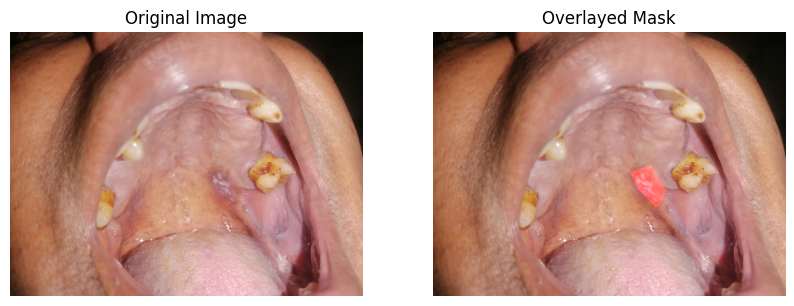

✅ Overlay visualization complete! Check the 'OverlayedImages' folder.


In [32]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

# Paths
ANNOTATION_PATH = "new dataset/Annotation.json"
IMAGE_DIR = "new dataset/Images"
MASKS_DIR = "BinaryMasked"
OVERLAY_DIR = "OverlayedImages"  # Save overlayed images
os.makedirs(OVERLAY_DIR, exist_ok=True)

# Load COCO annotations
coco = COCO(ANNOTATION_PATH)
image_ids = coco.getImgIds()

for img_id in image_ids:
    img_info = coco.loadImgs(img_id)[0]
    img_name = img_info["file_name"]
    img_path = os.path.join(IMAGE_DIR, img_name)
    mask_path = os.path.join(MASKS_DIR, img_name.replace(".jpg", "_mask.png"))
    
    # Load image and mask
    image = cv2.imread(img_path)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    
    if image is None or mask is None:
        print(f"⚠️ Skipping {img_name}, missing image/mask.")
        continue
    
    # Convert mask to color (Red overlay for lesions)
    mask_colored = np.zeros_like(image)
    mask_colored[:, :, 2] = mask  # Set red channel (BGR format)
    
    # Overlay mask on image with transparency
    alpha = 0.5  # Transparency factor
    overlay = cv2.addWeighted(image, 1, mask_colored, alpha, 0)
    
    # Save and show results
    overlay_path = os.path.join(OVERLAY_DIR, img_name.replace(".jpg", "_overlay.jpg"))
    cv2.imwrite(overlay_path, overlay)
    
    # Show one example
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(overlay, cv2.COLOR_BGR2RGB))
    plt.title("Overlayed Mask")
    plt.axis("off")
    
    plt.show()
    break  # Show only the first image

print("✅ Overlay visualization complete! Check the 'OverlayedImages' folder.")


convert binary masks to yolo format

In [14]:
import os
import cv2
import numpy as np

# Define paths
mask_dir = "BinaryMasked"  # Folder containing binary masks
label_dir = "yolo format text"  # Output YOLO labels directory

# Create output label directory if it doesn't exist
os.makedirs(label_dir, exist_ok=True)

# Class mapping based on pixel intensity
PIXEL_TO_CLASS = {255: 0, 128: 1}  # 255 = Lesion (0), 128 = Oral Cavity (1)

# Loop through all mask images
for mask_file in os.listdir(mask_dir):
    if not mask_file.endswith(".png"):
        continue

    mask_path = os.path.join(mask_dir, mask_file)
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)  # Read binary mask as grayscale

    # Ensure both classes are processed separately
    yolo_labels = []

    for pixel_value, class_id in PIXEL_TO_CLASS.items():
        # Create binary mask for each class
        class_mask = (mask == pixel_value).astype(np.uint8) * 255  # Isolate class

        # Find contours for the current class
        contours, _ = cv2.findContours(class_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        h, w = mask.shape  # Get mask dimensions

        for contour in contours:
            x, y, w_box, h_box = cv2.boundingRect(contour)  # Get bounding box

            # Normalize YOLO format: "class_id center_x center_y width height"
            x_center = (x + w_box / 2) / w
            y_center = (y + h_box / 2) / h
            w_norm = w_box / w
            h_norm = h_box / h

            yolo_labels.append(f"{class_id} {x_center:.6f} {y_center:.6f} {w_norm:.6f} {h_norm:.6f}")

    # Save annotation file
    if yolo_labels:
        txt_filename = mask_file.replace("_mask.png", ".txt")  # Match original image filename
        txt_path = os.path.join(label_dir, txt_filename)
        with open(txt_path, "w") as f:
            f.write("\n".join(yolo_labels))

print("✅ YOLO format conversion completed with BOTH classes!") 


✅ YOLO format conversion completed with BOTH classes!


setup dataset structure for yolo

In [15]:
import os
import random
import shutil

# Paths
original_images_dir = r"D:\Python projects\Minor Project\notebook\newStart\new dataset\Images"
train_images_dir = r"D:\Python projects\Minor Project\notebook\newStart\dataset\images\train"
val_images_dir = r"D:\Python projects\Minor Project\notebook\newStart\dataset\images\val"

yolo_labels_dir = r"D:\Python projects\Minor Project\notebook\newStart\yolo format text"
train_labels_dir = r"D:\Python projects\Minor Project\notebook\newStart\dataset\labels\train"
val_labels_dir = r"D:\Python projects\Minor Project\notebook\newStart\dataset\labels\val"

# Create directories if they don't exist
os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Get all image filenames (without extensions)
images = [f for f in os.listdir(original_images_dir) if f.endswith((".jpg", ".png", ".jpeg"))]
image_names = [os.path.splitext(f)[0] for f in images]  # Remove extensions

# Set 80-20 split
random.shuffle(image_names)  # Shuffle for randomness
split_index = int(0.8 * len(image_names))

train_image_names = image_names[:split_index]  # 80% training
val_image_names = image_names[split_index:]    # 20% validation

# Function to move images and labels
def move_files(image_name_list, dest_image_dir, dest_label_dir):
    for img_name in image_name_list:
        # Find image file (any extension)
        src_img_path = next((os.path.join(original_images_dir, f) for f in os.listdir(original_images_dir) if f.startswith(img_name)), None)
        if src_img_path:
            shutil.move(src_img_path, os.path.join(dest_image_dir, os.path.basename(src_img_path)))

        # Move corresponding YOLO label
        src_label_path = os.path.join(yolo_labels_dir, img_name + ".txt")
        if os.path.exists(src_label_path):
            shutil.move(src_label_path, os.path.join(dest_label_dir, img_name + ".txt"))

# Move images and labels
move_files(train_image_names, train_images_dir, train_labels_dir)
move_files(val_image_names, val_images_dir, val_labels_dir)

print(f"✅ Successfully moved {len(train_image_names)} images & labels to training and {len(val_image_names)} to validation.")


✅ Successfully moved 2400 images & labels to training and 600 to validation.


In [16]:
from ultralytics import YOLO

# Load YOLO model (pretrained)
model = YOLO("yolov8s.yaml")  # Or use yolov8s.yaml for better results

# Train the model
model.train(data="dataset/dataset.yaml", epochs=50, batch=8, imgsz=640)


New https://pypi.org/project/ultralytics/8.3.99 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.98  Python-3.12.8 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8s.yaml, data=dataset/dataset.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, sho

train: Scanning D:\Python projects\Minor Project\notebook\newStart\dataset\labels\train... 2400 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2400/2400 [00:02<00:00, 1005.70it/s]


train: New cache created: D:\Python projects\Minor Project\notebook\newStart\dataset\labels\train.cache


val: Scanning D:\Python projects\Minor Project\notebook\newStart\dataset\labels\val... 599 images, 0 backgrounds, 1 corrupt: 100%|██████████| 600/600 [00:00<00:00, 651.02it/s]

val: WARNING  D:\Python projects\Minor Project\notebook\newStart\dataset\images\val\N-260-01.jpg: ignoring corrupt image/label: image file is truncated (30 bytes not processed)


val: New cache created: D:\Python projects\Minor Project\notebook\newStart\dataset\labels\val.cache
Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G      2.818      3.077      3.555         32        640: 100%|██████████| 300/300 [01:04<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:08<00:00,  4.37it/s]


                   all        599       1364      0.804      0.306      0.303      0.147

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.98G      2.091      2.296      2.598         58        640: 100%|██████████| 300/300 [01:01<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.36it/s]


                   all        599       1364      0.901      0.346      0.417      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.98G      1.701      1.887      2.236         37        640: 100%|██████████| 300/300 [00:59<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.16it/s]


                   all        599       1364      0.423      0.452      0.426      0.258

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.98G      1.533      1.693      2.065         38        640: 100%|██████████| 300/300 [00:57<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.28it/s]


                   all        599       1364      0.474      0.506      0.464      0.332

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.98G      1.415      1.551      1.955         30        640: 100%|██████████| 300/300 [00:57<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.34it/s]


                   all        599       1364      0.543      0.528      0.478      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.98G      1.362      1.472      1.891         30        640: 100%|██████████| 300/300 [00:57<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]


                   all        599       1364      0.537      0.527      0.469      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.98G      1.281      1.387      1.823         36        640: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.22it/s]


                   all        599       1364      0.602      0.526      0.483      0.369

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.98G       1.22      1.321      1.763         41        640: 100%|██████████| 300/300 [00:57<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.14it/s]


                   all        599       1364      0.554      0.517      0.476      0.368

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.98G      1.197      1.285      1.751         40        640: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.33it/s]


                   all        599       1364      0.564      0.562      0.494      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.98G      1.151      1.253      1.708         33        640: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.46it/s]


                   all        599       1364       0.56      0.544      0.483      0.384

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.98G      1.131      1.236      1.696         36        640: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.29it/s]


                   all        599       1364      0.586      0.546      0.491       0.39

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.98G      1.128      1.223      1.677         39        640: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.41it/s]


                   all        599       1364      0.605      0.543      0.489      0.393

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.98G      1.101      1.174       1.64         33        640: 100%|██████████| 300/300 [00:58<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.33it/s]

                   all        599       1364      0.575      0.538      0.482      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.98G      1.078      1.154      1.625         30        640: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.39it/s]


                   all        599       1364      0.611       0.55      0.497        0.4

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.98G      1.073      1.151      1.611         35        640: 100%|██████████| 300/300 [00:56<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.83it/s]

                   all        599       1364      0.619      0.546      0.511      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.98G      1.046      1.134      1.588         34        640: 100%|██████████| 300/300 [00:55<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.81it/s]


                   all        599       1364        0.6      0.552        0.5      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.98G      1.031      1.118      1.575         37        640: 100%|██████████| 300/300 [00:57<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.48it/s]

                   all        599       1364       0.62      0.537      0.493      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.98G      1.017      1.101       1.56         43        640: 100%|██████████| 300/300 [00:57<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.35it/s]


                   all        599       1364      0.614      0.558      0.513       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.98G      1.006      1.101      1.557         44        640: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.28it/s]


                   all        599       1364      0.619      0.545      0.499      0.415

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.98G      1.012      1.082      1.552         50        640: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.50it/s]


                   all        599       1364      0.621      0.563      0.518      0.425

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.98G     0.9849      1.055      1.534         36        640: 100%|██████████| 300/300 [00:58<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.28it/s]

                   all        599       1364      0.634      0.553      0.522      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.98G      0.986      1.064       1.53         49        640: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.44it/s]


                   all        599       1364      0.648      0.554       0.53      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.98G     0.9714       1.04      1.513         38        640: 100%|██████████| 300/300 [00:57<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.18it/s]


                   all        599       1364      0.642      0.547      0.518      0.437

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.98G     0.9525      1.034      1.501         36        640: 100%|██████████| 300/300 [01:01<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  4.96it/s]


                   all        599       1364        0.6      0.555      0.513      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.98G     0.9351      1.024      1.488         47        640: 100%|██████████| 300/300 [01:00<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.53it/s]


                   all        599       1364      0.646      0.546      0.529      0.438

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.98G     0.9496      1.017      1.487         53        640: 100%|██████████| 300/300 [00:56<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.64it/s]


                   all        599       1364      0.632      0.564      0.528      0.432

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.98G     0.9285     0.9947      1.467         33        640: 100%|██████████| 300/300 [00:59<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.06it/s]


                   all        599       1364      0.638      0.562      0.533      0.443

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.98G     0.9163     0.9852      1.463         41        640: 100%|██████████| 300/300 [00:58<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.33it/s]


                   all        599       1364      0.648      0.563      0.544      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.98G     0.9138     0.9816      1.457         46        640: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.41it/s]

                   all        599       1364      0.656      0.548      0.535      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.98G     0.9132     0.9836      1.457         46        640: 100%|██████████| 300/300 [00:57<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.25it/s]


                   all        599       1364       0.66      0.577      0.545      0.446

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.98G      0.891     0.9598      1.442         31        640: 100%|██████████| 300/300 [00:58<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.47it/s]


                   all        599       1364      0.659      0.567      0.549      0.457

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.98G     0.8926     0.9594      1.434         45        640: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.34it/s]

                   all        599       1364      0.662      0.571      0.551      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.98G     0.8789     0.9472      1.434         42        640: 100%|██████████| 300/300 [00:58<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.39it/s]

                   all        599       1364      0.667      0.573      0.553       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.98G     0.8667     0.9417      1.427         42        640: 100%|██████████| 300/300 [00:57<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.46it/s]


                   all        599       1364      0.656       0.57      0.544      0.455

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.98G     0.8674     0.9355      1.418         34        640: 100%|██████████| 300/300 [00:58<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.45it/s]


                   all        599       1364      0.655      0.581      0.559      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.98G     0.8671     0.9256      1.421         41        640: 100%|██████████| 300/300 [00:57<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]


                   all        599       1364      0.668      0.582      0.558      0.466

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.98G     0.8513      0.925      1.415         39        640: 100%|██████████| 300/300 [00:57<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.49it/s]


                   all        599       1364      0.664       0.57      0.555      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.98G     0.8533     0.9143      1.409         25        640: 100%|██████████| 300/300 [00:57<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.42it/s]

                   all        599       1364      0.677      0.572      0.559      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.98G     0.8475     0.9023      1.406         42        640: 100%|██████████| 300/300 [00:57<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.30it/s]

                   all        599       1364      0.681      0.578      0.564       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.98G     0.8395     0.9043        1.4         33        640: 100%|██████████| 300/300 [00:58<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.40it/s]

                   all        599       1364      0.687      0.575      0.561      0.475


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.98G     0.8254     0.9464      1.406         20        640: 100%|██████████| 300/300 [00:58<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.51it/s]

                   all        599       1364      0.714      0.554      0.565      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.98G     0.8261     0.9264      1.398         15        640: 100%|██████████| 300/300 [00:57<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.38it/s]

                   all        599       1364        0.7      0.579      0.566      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.98G      0.805     0.9085      1.391         21        640: 100%|██████████| 300/300 [00:57<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.39it/s]

                   all        599       1364      0.713      0.581      0.572      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.98G     0.7954     0.9061      1.376         18        640: 100%|██████████| 300/300 [00:57<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:06<00:00,  5.46it/s]

                   all        599       1364      0.714      0.575      0.575      0.479



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.98G     0.7866     0.8759      1.364         16        640: 100%|██████████| 300/300 [00:57<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.42it/s]

                   all        599       1364      0.739      0.556      0.577      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.98G     0.7747     0.8708      1.353         16        640: 100%|██████████| 300/300 [00:57<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.22it/s]

                   all        599       1364      0.709      0.575      0.573       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.98G     0.7719     0.8651      1.352         16        640: 100%|██████████| 300/300 [00:57<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.43it/s]

                   all        599       1364      0.711      0.583      0.581       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.98G     0.7617     0.8509      1.342         14        640: 100%|██████████| 300/300 [00:57<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.38it/s]


                   all        599       1364      0.711      0.581      0.577      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.98G     0.7611     0.8494      1.339         18        640: 100%|██████████| 300/300 [00:57<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.35it/s]

                   all        599       1364      0.731      0.581      0.582      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.98G     0.7453     0.8358      1.332         16        640: 100%|██████████| 300/300 [00:57<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.40it/s]

                   all        599       1364      0.716      0.585      0.583      0.485



50 epochs completed in 0.935 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 22.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.98  Python-3.12.8 torch-2.5.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
YOLOv8s summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 38/38 [00:07<00:00,  5.26it/s]


                   all        599       1364      0.734      0.581      0.582      0.486
                lesion        434        639      0.469      0.335      0.312      0.168
           oral cavity        599        725      0.998      0.826      0.852      0.803
Speed: 0.2ms preprocess, 4.4ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000177FEA1B620>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0